In [93]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import scipy as st
from pathlib import Path
import json
import requests
# from config import api_key
# from sklearn import datasets


In [94]:
#Creating path

csvpath1= Path("nba.csv")
csvpath2= Path("Playoffs.csv")
csvpath3= Path("Regular_Season.csv")

#Reading the csv files 

nba_df= pd.read_csv(csvpath1)
playoffs_df= pd.read_csv(csvpath2)
reg_season_df= pd.read_csv(csvpath3)

In [95]:
#Renaming columns in nba_df, playoffs_df and reg_season_df

nba_df= nba_df.rename(columns={"PLAYER_ID": "Player_ID", "GP": "Games played", "MIN": "Minutes Played", 
                               "PTS": "Points","RANK": "Rank", "PLAYER": "Player", "TEAM_ID": "Team_ID",
                                 "TEAM":"Team","year": "Year"})

playoffs_df= playoffs_df.rename(columns={"PLAYER_ID": "Player_ID", "GP": "Games played", "MIN": "Minutes Played", 
                               "PTS": "Points","RANK": "Rank", "PLAYER": "Player", "TEAM_ID": "Team_ID",
                                 "TEAM":"Team","year": "Year"})

reg_season_df= reg_season_df.rename(columns={"PLAYER_ID": "Player_ID", "GP": "Games played", "MIN": "Minutes Played", 
                               "PTS": "Points","RANK": "Rank", "PLAYER": "Player", "TEAM_ID": "Team_ID",
                                 "TEAM":"Team","year": "Year"})


In [96]:
#checking for null values in the 3 dfs

nullone= pd.isnull(nba_df)
nulltwo= pd.isnull(playoffs_df)
nullthree= pd.isnull(reg_season_df)

# Dropping any null values

nba_df= nba_df.dropna()
playoffs_df= playoffs_df.dropna()
reg_season_df= reg_season_df.dropna()

# No null values found and dropped

In [97]:
# Dropping the first column in playoffs_df and first 2 columns in reg_season_df 

playoffs_df = playoffs_df.drop("Unnamed: 0.1", axis=1)
reg_season_df= reg_season_df.drop(["Unnamed: 0.1", "Unnamed: 0"], axis=1)


# Replacing "Regular%20Season" value in season_type column in  nba_df to "Regular"

nba_df['Season_type'] = nba_df['Season_type'].replace('Regular%20Season', 'Regular')


# Replacing "Regular_Season" value in season_type column in reg_seasons_df to "Regular"

reg_season_df['Season_type'] = reg_season_df['Season_type'].replace('Regular_Season', 'Regular')

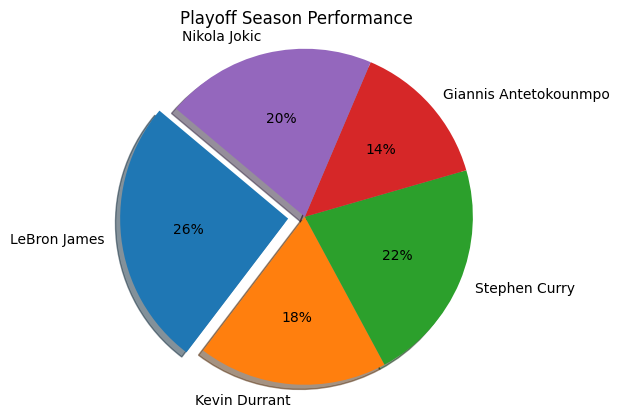

<Figure size 640x480 with 0 Axes>

In [98]:
# Question 1: What is the difference in performance of the top 5 players in regular and playoff seasons?
# Show their comparison.  

#Finding the players with number 1 rank in the nba_dataset
ranks= nba_df.loc[nba_df["Rank"]==1]

#Choosing 5 random players from ranks.
 
top_5= ["LeBron James", "Kevin Durrant", "Stephen Curry", "Giannis Antetokounmpo", "Nikola Jokic"]

#3 offensive metrics (Points, AST, FGA) AND 3 defensive metrics (REB,STL,BLK)
performance_metrics= ["PTS", "AST", "FGA", "REB", "STL", "BLK"]

#PLAYOFFS SEASON CALCULATION FOR TOP 5 PLAYERS 
# We look up each players 5 performance metrics as mentioned above. Then calculated the horizontal average across those 6 columns
# and created a new column to store that calculation with the name of Average Stats. 

LeBron_James = playoffs_df.loc[playoffs_df['Player'] == 'LeBron James', ["Points", "AST", "FGA", "REB", "STL", "BLK", "Minutes Played"]]
LeBron_James['Average Stats'] = LeBron_James[["Points", "AST", "FGA", "REB", "STL", "BLK"]].mean(axis=1)
lebron= LeBron_James['Average Stats'].mean()

Kevin_Durrant = playoffs_df.loc[playoffs_df['Player'] == 'Kevin Durant', ["Points", "AST", "FGA", "REB", "STL", "BLK", "Minutes Played"]]
Kevin_Durrant['Average Stats'] = Kevin_Durrant[["Points", "AST", "FGA", "REB", "STL", "BLK"]].mean(axis=1)
kevin= Kevin_Durrant['Average Stats'].mean()


stephen_curry = playoffs_df.loc[playoffs_df['Player'] == 'Stephen Curry', ["Points", "AST", "FGA", "REB", "STL", "BLK", "Minutes Played"]]
stephen_curry['Average Stats'] = stephen_curry[["Points", "AST", "FGA", "REB", "STL", "BLK"]].mean(axis=1)
curry= stephen_curry['Average Stats'].mean()

Giannis_Antetokounmpo = playoffs_df.loc[playoffs_df['Player'] == 'Giannis Antetokounmpo', ["Points", "AST", "FGA", "REB", "STL", "BLK", "Minutes Played"]]
Giannis_Antetokounmpo['Average Stats'] = Giannis_Antetokounmpo[["Points", "AST", "FGA", "REB", "STL", "BLK"]].mean(axis=1)
giannis= Giannis_Antetokounmpo['Average Stats'].mean()


Nikola_Jokic =playoffs_df.loc[playoffs_df['Player'] == 'Nikola Jokic', ["Points", "AST", "FGA", "REB", "STL", "BLK", "Minutes Played"]]
Nikola_Jokic['Average Stats'] = Nikola_Jokic[["Points", "AST", "FGA", "REB", "STL", "BLK"]].mean(axis=1)
nikola= Nikola_Jokic['Average Stats'].mean()

performance= [lebron, kevin, curry, giannis, nikola]
explode= [0.1,0,0,0,0]

plt.pie(performance, explode=explode, labels=top_5,
        autopct="%1.0f%%", shadow=True, startangle=140)
plt.axis('equal')
plt.title("Playoff Season Performance")
plt.show()

plt.savefig("Playoff _Season_Performance_Top5.png")
plt.show()
